In [9]:
import json

def save_last_visited_url(url):
    filename = 'start_url.json'
    with open(filename, 'w') as file:
        json.dump({'start_url': url}, file)
        print(f"Saved last visited url: {url} to {filename}")

# save_last_visited_url("https://www.grainger.com/category")


In [10]:
import json
import os

from urllib.parse import urlparse, urljoin

domain = "https://www.grainger.com"
filename = 'start_url.json'
with open(filename, 'r') as file:
    data = json.load(file)
    start_url = data['start_url']
    print(f"start_url: {start_url}")
    
local_domain = urlparse(domain).netloc

start_url: https://www.grainger.com/know-how/equipment


In [11]:
### WEB CRAWLING THE GRAINGER SITE REQUIRES GRAINGER VPN ACCESS

In [12]:
# # BREADTH-FIRST SEARCH
# import time
# import os
# from urllib.parse import urlparse, urljoin
# from collections import deque
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# from webdriver_manager.chrome import ChromeDriverManager
# from bs4 import BeautifulSoup
# import re
# 
# # Selenium setup
# options = Options()
# options.add_argument("--headless")
# options.add_argument("--disable-gpu")
# service = Service(ChromeDriverManager().install())
# driver = webdriver.Chrome(service=service, options=options)
# 
# # Function to get the hyperlinks from a URL using Selenium
# def get_hyperlinks(url):
#     print(f"Getting hyperlinks for URL: {url}")
#     try:
#         driver.get(url)
#         time.sleep(1)  # Adjust wait time as needed based on page load speed
#         html = driver.page_source
#         soup = BeautifulSoup(html, 'html.parser')
#         hyperlinks = [a['href'] for a in soup.find_all('a', href=True)]
#         return hyperlinks
#     except Exception as e:
#         print(f"Error getting hyperlinks: {e}")
#         return []
# 
# # Function to crawl the website
# def crawl(url):
#     local_domain = urlparse(domain).netloc
#     queue = deque([url])
#     seen = {url}
#     clean_links = []
#     last_visited_url = None  
# 
#     # Create necessary directories if they don't exist
#     if not os.path.exists("text/"):
#         os.mkdir("text/")
#     if not os.path.exists(f"text/{local_domain}/"):
#         os.mkdir(f"text/{local_domain}/")
#     if not os.path.exists("processed"):
#         os.mkdir("processed")
# 
#     while queue and len(clean_links) < 1000:
#         url = queue.popleft()  # Use popleft to ensure we process URLs in a breadth-first manner
#         print(f"Crawling URL: {url}")
#         try:
#             # Construct file path for saving content
#             file_path = f"text/{local_domain}/{url[8:].replace('/', '_')}.txt"
#             with open(file_path, "w") as f:
#                 driver.get(url)
#                 time.sleep(3)  # Adjust wait time as needed based on page load speed
#                 soup = BeautifulSoup(driver.page_source, "html.parser")
#                 text = soup.get_text()
#                 if "You need to enable JavaScript to run this app." in text:
#                     print(f"Unable to parse page {url} due to JavaScript being required")
#                 f.write(text)
#                 # print(f"Writing: {text}")
#         except Exception as e:
#             print(f"Error crawling URL: {e}")
# 
#         try:
#             new_links = get_domain_hyperlinks(local_domain, url, clean_links)
#             for link in new_links:
#                 if link not in seen:
#                     queue.append(link)
#                     seen.add(link)
#         except Exception as e:
#             print(f"Error processing links: {e}")
# 
#     print(f"Collected {len(clean_links)} clean links")
#     if last_visited_url:
#         print(f"Last visited URL: {last_visited_url}")
#         save_last_visited_url(last_visited_url)
# 
# # Function to get the hyperlinks from a URL that are within the same domain and base URL
# def get_domain_hyperlinks(local_domain, url, clean_links):
#     # regex_pattern = re.compile(r'-[a-zA-Z0-9]+\?.*')
#     regex_pattern = re.compile(r'-((?=.*\d.*\d.*\d)[A-Z0-9]{5,7})\?.*')
#     
#     hyperlinks = get_hyperlinks(url)
#     print(f"Found {len(hyperlinks)} hyperlinks on {url}")
#     for link in set(hyperlinks):
#         clean_link = None
#         print(f"Checking link: {link}")
# 
#         # Handle absolute URLs
#         if link.startswith("http"):
#             url_obj = urlparse(link)
#             if url_obj.netloc == local_domain and link.startswith(domain):
#                 clean_link = link
#         else:
#             # Handle relative URLs
#             clean_link = urljoin(url, link)
# 
#         if clean_link is not None and '@' not in clean_link and regex_pattern.search(clean_link):
#             if clean_link.endswith("/"):
#                 clean_link = clean_link[:-1]
#             if clean_link not in clean_links:
#                 print(f"Adding clean link: {clean_link}")
#                 clean_links.append(clean_link)
# 
#         # Stop collecting if we reach 1000 links
#         if len(clean_links) >= 1000:
#             last_visited_url = url  
#             break
# 
#     print(f"Clean links: {clean_links}")
#     return list(set(hyperlinks))
# 
# crawl(start_url)
# 
# driver.quit()


In [ ]:
# DEPTH FIRST SEARCH
import time
import os
from urllib.parse import urlparse, urljoin
from collections import deque
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import re

# Selenium setup
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Function to get the hyperlinks from a URL using Selenium
def get_hyperlinks(url):
    print(f"Getting hyperlinks for URL: {url}")
    try:
        driver.get(url)
        time.sleep(1)  # Adjust wait time
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        hyperlinks = [a['href'] for a in soup.find_all('a', href=True)]
        return hyperlinks
    except Exception as e:
        print(f"Error getting hyperlinks: {e}")
        return []

# Function to crawl the website using depth-first strategy
def crawl(url):
    local_domain = urlparse(url).netloc
    stack = [url]  # Use a stack instead of a queue for depth-first
    seen = {url}
    clean_links = []
    last_visited_url = None  # Variable to store the last visited URL

    # Create necessary directories if they don't exist
    if not os.path.exists("text/"):
        os.mkdir("text/")
    if not os.path.exists(f"text/{local_domain}/"):
        os.mkdir(f"text/{local_domain}/")
    if not os.path.exists("processed"):
        os.mkdir("processed")

    while stack and len(clean_links) < 100000:
        url = stack.pop()  # Use pop() to ensure we process URLs in a depth-first manner
        print(f"Crawling URL: {url}")
        try:     
            # Handle absolute URLs
            if url.startswith("http://") or url.startswith("https://"):
                url_domain = urlparse(url).netloc
                if url_domain != local_domain:
                    print(f"Skipping URL: {url} (Not part of {url})")
                    continue

            # Construct file path for saving content
            file_path = f"text/{local_domain}/{url[8:].replace('/', '_')}.txt"
            with open(file_path, "w") as f:
                driver.get(url)
                time.sleep(1)  # Adjust wait time as needed based on page load speed
                soup = BeautifulSoup(driver.page_source, "html.parser")
                text = soup.get_text()
                if "You need to enable JavaScript to run this app." in text:
                    print(f"Unable to parse page {url} due to JavaScript being required")
                f.write(text)
            last_visited_url = url  # Update the last visited URL
        except Exception as e:
            print(f"Error crawling URL: {e}")

        try:
            new_links = get_domain_hyperlinks(local_domain, url, clean_links)
            for link in new_links:
                if link not in seen:
                    stack.append(link)
                    seen.add(link)
        except Exception as e:
            print(f"Error processing links: {e}")

    print(f"Collected {len(clean_links)} clean links")
    if last_visited_url:
        print(f"Last visited URL: {last_visited_url}")
        save_last_visited_url(last_visited_url)

# Function to get the hyperlinks from a URL that are within the same domain and base URL
def get_domain_hyperlinks(local_domain, url, clean_links):
    regex_pattern = re.compile(r'/product/.*-[A-Z0-9]{5,7}(?=.*\d.*\d.*\d)\?.*')

    hyperlinks = get_hyperlinks(url)
    print(f"Found {len(hyperlinks)} hyperlinks on {url}")
    for link in set(hyperlinks):
        clean_link = None
        print(f"Checking link: {link}")

        # Handle absolute URLs
        if link.startswith("http"):
            url_obj = urlparse(link)
            if url_obj.netloc == local_domain and link.startswith(url):
                clean_link = link
        else:
            # Handle relative URLs
            clean_link = urljoin(url, link)

        if clean_link is not None and '@' not in clean_link and regex_pattern.search(clean_link):
            if clean_link.endswith("/"):
                clean_link = clean_link[:-1]
            if clean_link not in clean_links:
                print(f"Adding clean link: {clean_link}")
                clean_links.append(clean_link)

        # Stop collecting if we reach n links
        if len(clean_links) >= 100000:
            break

    print(f"Clean links: {clean_links}")
    return list(set(hyperlinks))


crawl(start_url)

driver.quit()


In [14]:
def remove_newlines(serie):
    serie = serie.str.replace('\n', ' ')
    serie = serie.str.replace('\\n', ' ')
    serie = serie.str.replace('  ', ' ')
    serie = serie.str.replace('  ', ' ')
    return serie

In [15]:

import pandas as pd
import os

def print_file_size(file_path):
    size = os.path.getsize(file_path)
    print(f"Size of {file_path}: {size} bytes")


# Create a list to store the text files
texts=[]

domain_dir = os.path.join("text", local_domain)
abs_domain_dir = os.path.abspath(domain_dir)

if os.path.exists(abs_domain_dir):
    # Get all the text files in the text directory
    for file in os.listdir(abs_domain_dir):

        try:
            # Open the file and read the text
            with open("text/" + local_domain + "/" + file, "r") as f:
                text = f.read()

                texts.append((file.replace('-', ' ').replace('_', ' ').replace('#update', ''), text))
        except Exception as e:
            print(f"Exception occurred during reading file '{text}': {e}")       
else:
    print(f"Directory '{abs_domain_dir}' does not exist.")


# Create a dataframe from the list of texts
df = pd.DataFrame(texts, columns = ['fname', 'text'])

# Set the text column to be the raw text with the newlines removed
df['text'] = df.fname + ". " + remove_newlines(df.text)

# Load the existing scraped.csv if it exists
scraped_csv_path = 'processed/scraped.csv'
if os.path.exists(scraped_csv_path):
    existing_df = pd.read_csv(scraped_csv_path)
    print_file_size(scraped_csv_path)
    # Append the new data to the existing data
    combined_df = pd.concat([existing_df, df])
else:
    combined_df = df


# Remove duplicates
combined_df.drop_duplicates(inplace=True)

# Fill any empty columns with empty strings
combined_df.fillna("", inplace=True)

# Save the combined dataframe to scraped.csv
combined_df.to_csv(scraped_csv_path, index=False)

# Print size of the combined file
print_file_size(scraped_csv_path)

df = combined_df
df.to_csv("processed/scraped.csv")
df.head()

/var/folders/63/_3zfxz6d0sx1clfnq976wwhr0000gq/T/ipykernel_63455/2966875972.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  serie = serie.str.replace('\\n', ' ')


Size of processed/scraped.csv: 649 bytes
Size of processed/scraped.csv: 72147162 bytes


,Unnamed: 0,fname,text
0,0.0,.txt,.txt.
1,1.0,www.grainger.com know how equipment.txt,www.grainger.com know how equipment.txt. Whoo...
0,,HUBBELL WIRING DEVICE KELLEMS Cable Protector...,HUBBELL WIRING DEVICE KELLEMS Cable Protector...
1,,y pumps double diaphragm pumps.txt,y pumps double diaphragm pumps.txt.
2,,SELLSTROM Fire Blanket Fire Blanket 1N783.txt,SELLSTROM Fire Blanket Fire Blanket 1N783.txt.


Token indices sequence length is longer than the specified maximum sequence length for this model (5294 > 1024). Running this sequence through the model will result in indexing errors


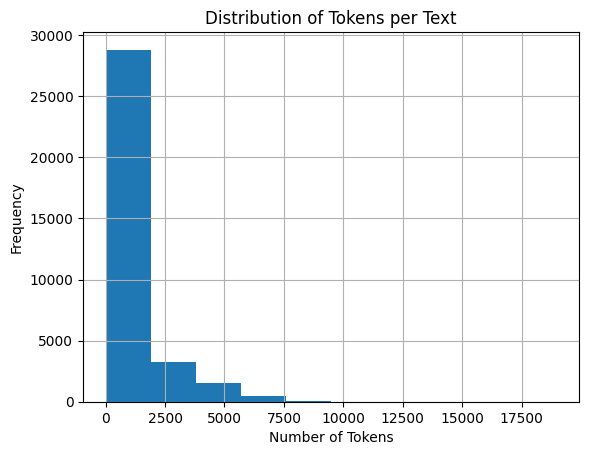

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2Tokenizer

# Load the dataframe from the CSV file
df = pd.read_csv('processed/scraped.csv')

# Initialize the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Calculate the number of tokens for each text
df['n_tokens'] = df.text.apply(lambda x: len(tokenizer.encode(x)))

# Visualize the distribution of the number of tokens per row using a histogram
df.n_tokens.hist()
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Distribution of Tokens per Text')
plt.show()
